In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
import random
import os
import shutil
import albumentations as A
#from albumentations.pytorch import ToTensorV2
import cv2
import torch.backends.cudnn as cudnn
import torch.nn as nn
import torchvision.models as models
cudnn.benchmark=True

In [ ]:
train_transform = A.Compose(
    [
        A.SmallestMaxSize(max_size=160),
        A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=15, p=0.5),
        A.RandomCrop(height=128, width=128),
        A.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=15, p=0.5),
        A.RandomBrightnessContrast(p=0.5),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        #ToTensorV2(),
    ]
)

In [ ]:
impath='/content/drive/MyDrive/ISblue_workshop/dataset/train/class1/103.png'
image=cv2.imread(impath)
transform_resize=A.SmallestMaxSize(max_size=300)
img_t= transform_resize(image=image)["image"]

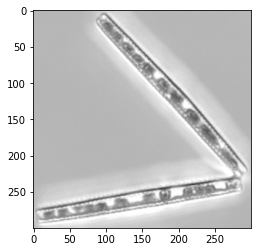

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img_t)

In [ ]:
transrr=A.RandomCrop(height=128, width=128)
img_rr= transrr(image=image)["image"]

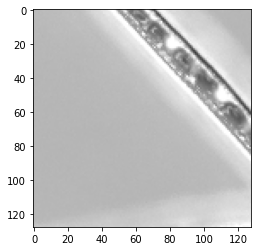

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img_rr)

In [ ]:
transsft=A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=15, p=0.5)
img_sft= transsft(image=image)["image"]

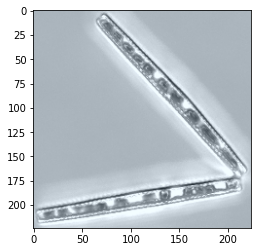

In [ ]:
transrgbs=A.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=15, p=0.5)
img_rgbs=transrgbs(image=image)["image"]
plt.imshow(img_rgbs)

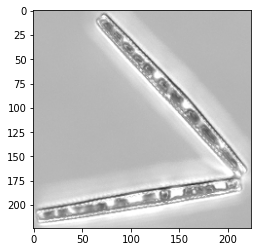

In [ ]:
transrb=A.RandomBrightnessContrast(p=0.5)
img_rb=transrb(image=image)["image"]
plt.imshow(img_rb)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


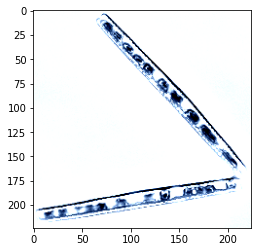

In [ ]:
transnorm=A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
img_norm=transnorm(image=image)["image"]
plt.imshow(img_norm)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


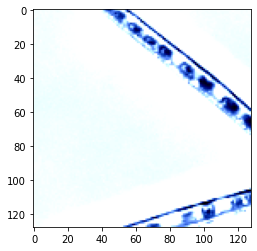

In [ ]:
train_transform = A.Compose(
    [
        A.SmallestMaxSize(max_size=160),
        A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=15, p=0.5),
        A.RandomCrop(height=128, width=128),
        A.RGBShift(r_shift_limit=15, g_shift_limit=15, b_shift_limit=15, p=0.5),
        A.RandomBrightnessContrast(p=0.5),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        #ToTensorV2(),
    ]
)
img_compo=train_transform(image=image)["image"]
plt.imshow(img_compo)